In [75]:
import os, math
import numpy as np
import pandas as pd
import seaborn as sns
import sys
sys.path.append('/Users/yao/Desktop/ML/cancer/I_vote_for_cancer/yao/misc')
import helpers

%matplotlib inline
import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.metrics import log_loss

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

train_full = pd.read_csv('../feature_engineer/training_SeparateText.csv')
train_full = train_full.sort_values('ID').reset_index(drop=True)

In [97]:
tfidf = TfidfVectorizer(max_features=50000, lowercase = True, analyzer='word', max_df=0.7, min_df=1)
ffilter = TruncatedSVD(n_components=1000)

##Data and labels
y_train = train_full["Class"]
X_train = ffilter.fit_transform(tfidf.fit_transform(train_full["SeparateText"]), y_train)

In [98]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

clf = NearestCentroid()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

Normalized confusion matrix
[[ 0.77  0.02  0.    0.04  0.05  0.05  0.07  0.    0.  ]
 [ 0.19  0.49  0.01  0.03  0.    0.    0.29  0.    0.  ]
 [ 0.13  0.01  0.55  0.08  0.09  0.06  0.08  0.    0.  ]
 [ 0.43  0.01  0.01  0.38  0.05  0.03  0.07  0.01  0.  ]
 [ 0.24  0.02  0.04  0.06  0.35  0.08  0.19  0.01  0.02]
 [ 0.24  0.05  0.    0.04  0.05  0.47  0.15  0.    0.  ]
 [ 0.16  0.18  0.04  0.01  0.    0.    0.6   0.    0.  ]
 [ 0.05  0.    0.    0.    0.    0.    0.    0.95  0.  ]
 [ 0.08  0.03  0.    0.    0.    0.    0.05  0.    0.84]]


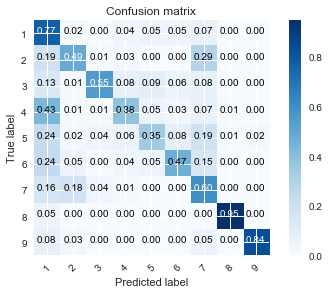

In [99]:
helpers.plot_confusion_matrix(y_train, y_pred, classes=range(1,10), normalize=True)

In [100]:
import sklearn
sklearn.metrics.accuracy_score(y_train, y_pred)

0.54260764829870523